In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d

import os

from tqdm import tqdm

In [204]:
    def cvar(wealth, w, alpha):
        return np.mean(w + (np.maximum(-wealth - w, 0) / (1 - alpha)))


In [214]:
dirc = 'tun/TCN///'
tun = pd.DataFrame(index = range(len(os.listdir(dirc))),columns = 
                   ['neurone','layer','maxT','epsilon','model','what'])
var_list=list()
for directory in tqdm(os.listdir(dirc)):
    if "pd" in directory.split('_')[-1]:
        mid_pd = pd.read_csv(dirc+directory,index_col=['Unnamed: 0']).T
        
        Var_file = directory[:-7]+'_Var.csv'
        Vari = pd.read_csv(dirc+Var_file,index_col=['Unnamed: 0']).T.values[0].T
        mid_pd['Var1'] = np.quantile(Vari,0.01)
        mid_pd['Var5'] =  np.quantile(Vari,0.05)
        mid_pd['Var20'] =  np.quantile(Vari,0.2)
        mid_pd['CVar1'] = cvar(Vari,mid_pd['price_free'].astype(np.double).values,0.01)
        mid_pd['CVar5'] =  cvar(Vari,mid_pd['price_free'].astype(np.double).values,0.05)
        mid_pd['CVar20'] =  cvar(Vari,mid_pd['price_free'].astype(np.double).values,0.2)
        var_list.append(mid_pd)
Var_pd = pd.concat(var_list)
Var_pd[['m','d','maxT','epsilon','CVar99','CVar95','CVar90'
        ,'CVar80','CVar50','Var99','Var95',
        'Var90','Var80','Var50','Mean_PnL',
        'Std_PnL','price','price_BS','price_free']
      ] = Var_pd[['m','d','maxT','epsilon','CVar99','CVar95','CVar90'
        ,'CVar80','CVar50','Var99','Var95',
        'Var90','Var80','Var50','Mean_PnL',
        'Std_PnL','price','price_BS','price_free']].astype(np.double)
Var_pd.index = range(Var_pd.shape[0])

100%|██████████████████████████████████████████| 73/73 [00:00<00:00, 325.50it/s]


In [206]:
mid_pd['price_free'].astype(np.double).values

array([2.26636467])

In [215]:
nb = Var_pd.shape[0]
Var_pd['price_diff'] = Var_pd['price'] - Var_pd['price_free']
Var_pd['predicted_price_diff'] = Var_pd['price_BS'] - Var_pd['price_free']

Var_pd['name'] = (Var_pd['m'].astype(str) + '_' + Var_pd['d'].astype(str) +
                  '_' + Var_pd['maxT'].astype(str))

In [208]:
Var_pd

,d,m,maxT,model,epsilon,CVar99,CVar95,CVar90,CVar80,CVar50,...,price_free,Var1,Var5,Var20,CVar1,CVar5,CVar20,price_diff,predicted_price_diff,name
0,2.0,5.0,3.0,Deep_Hedging_Model_TCN_CLAMP,0.001,88.839737,19.568027,10.909064,6.579581,3.981893,...,2.250100,-6.526827,-5.164169,-3.898311,3.124743,3.161570,3.332471,1.784835,0.037050,5.0_2.0_3.0
1,1.0,5.0,1.0,Deep_Hedging_Model_TCN_CLAMP,0.001,63.529392,14.533698,8.409238,5.347006,3.509668,...,2.284776,-5.289893,-4.322078,-3.429556,2.903408,2.929456,3.050333,0.952164,0.002375,5.0_1.0_1.0
2,1.0,15.0,11.0,Deep_Hedging_Model_TCN_CLAMP,0.000,63.421501,14.550950,8.442131,5.387722,3.555077,...,2.333314,-6.125969,-4.944306,-3.617644,2.950366,2.976347,3.096916,1.429362,-0.046163,15.0_1.0_11.0
3,2.0,10.0,30.0,Deep_Hedging_Model_TCN_CLAMP,0.000,89.787788,19.770647,11.018506,6.642436,4.016793,...,2.266365,-7.905168,-6.108806,-4.057467,3.150419,3.187643,3.360382,3.460945,0.020786,10.0_2.0_30.0
4,1.0,30.0,3.0,Deep_Hedging_Model_TCN_CLAMP,0.001,140.793884,29.970821,16.117941,9.191501,5.035635,...,2.265058,-8.843101,-6.940317,-4.979785,3.664340,3.723257,3.996669,4.056973,0.022092,30.0_1.0_3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2.0,30.0,6.0,Deep_Hedging_Model_TCN_CLAMP,0.000,111.965736,24.215265,13.246458,7.762055,4.471413,...,2.277652,-9.328779,-6.900020,-4.516482,3.385612,3.432263,3.648753,5.548297,0.009499,30.0_2.0_6.0
76,1.0,10.0,3.0,Deep_Hedging_Model_TCN_CLAMP,0.000,42.632320,10.339557,6.302960,4.284663,3.073684,...,2.266365,-4.649615,-3.865483,-3.088966,2.674102,2.691269,2.770939,0.531609,0.020786,10.0_1.0_3.0
77,1.0,5.0,11.0,Deep_Hedging_Model_TCN_CLAMP,0.000,65.928452,14.993380,8.626494,5.443052,3.532987,...,2.259610,-6.247068,-4.979866,-3.565543,2.902729,2.929808,3.055470,1.469186,0.027541,5.0_1.0_11.0
78,1.0,15.0,1.0,Deep_Hedging_Model_TCN_CLAMP,0.001,60.518555,13.970361,8.151838,5.242576,3.497019,...,2.333314,-5.325650,-4.297176,-3.402607,2.921043,2.945790,3.060629,0.902734,-0.046163,15.0_1.0_1.0


<IPython.core.display.Javascript object>


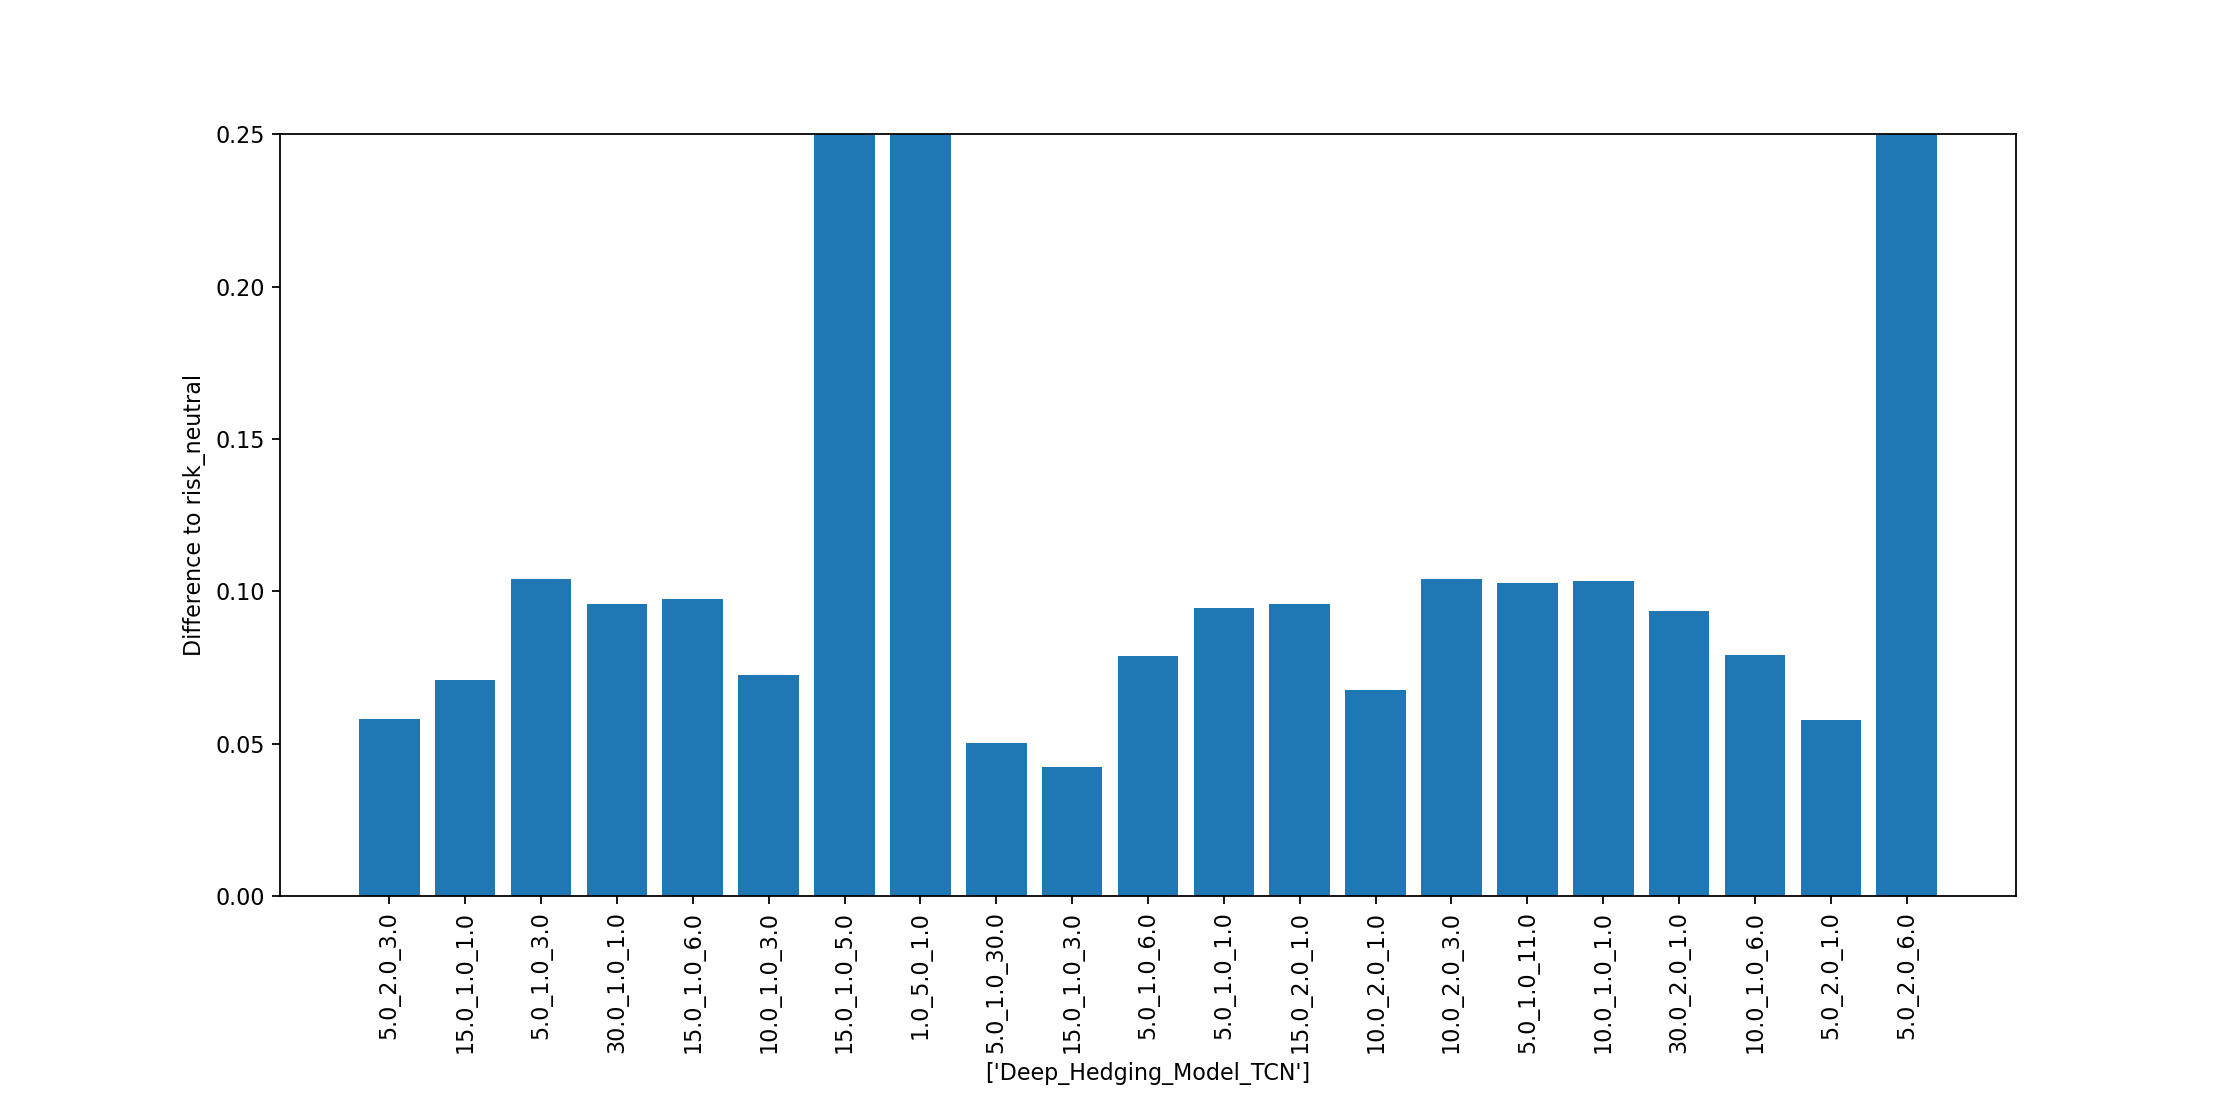

<IPython.core.display.Javascript object>


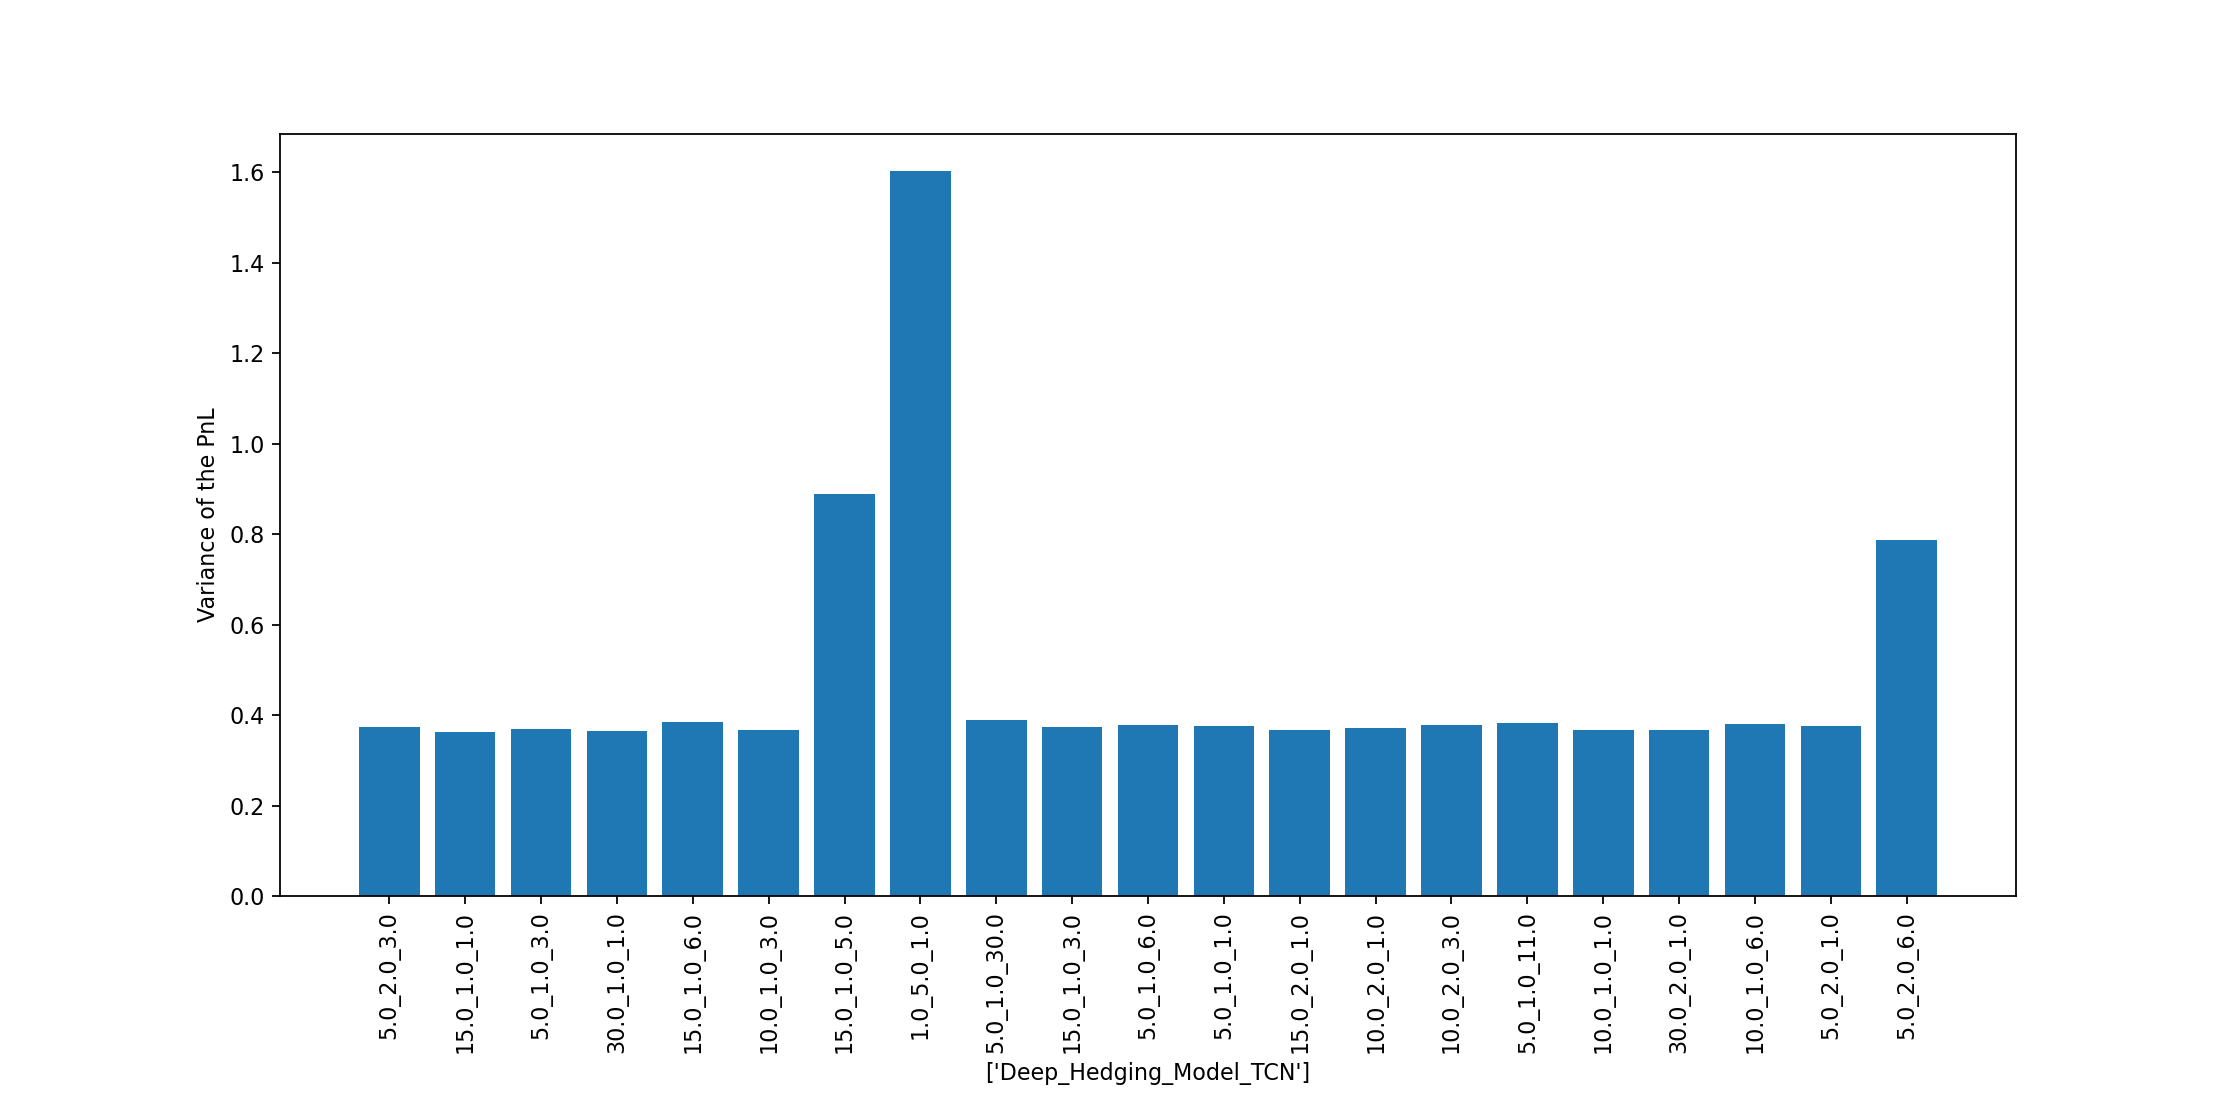

<IPython.core.display.Javascript object>


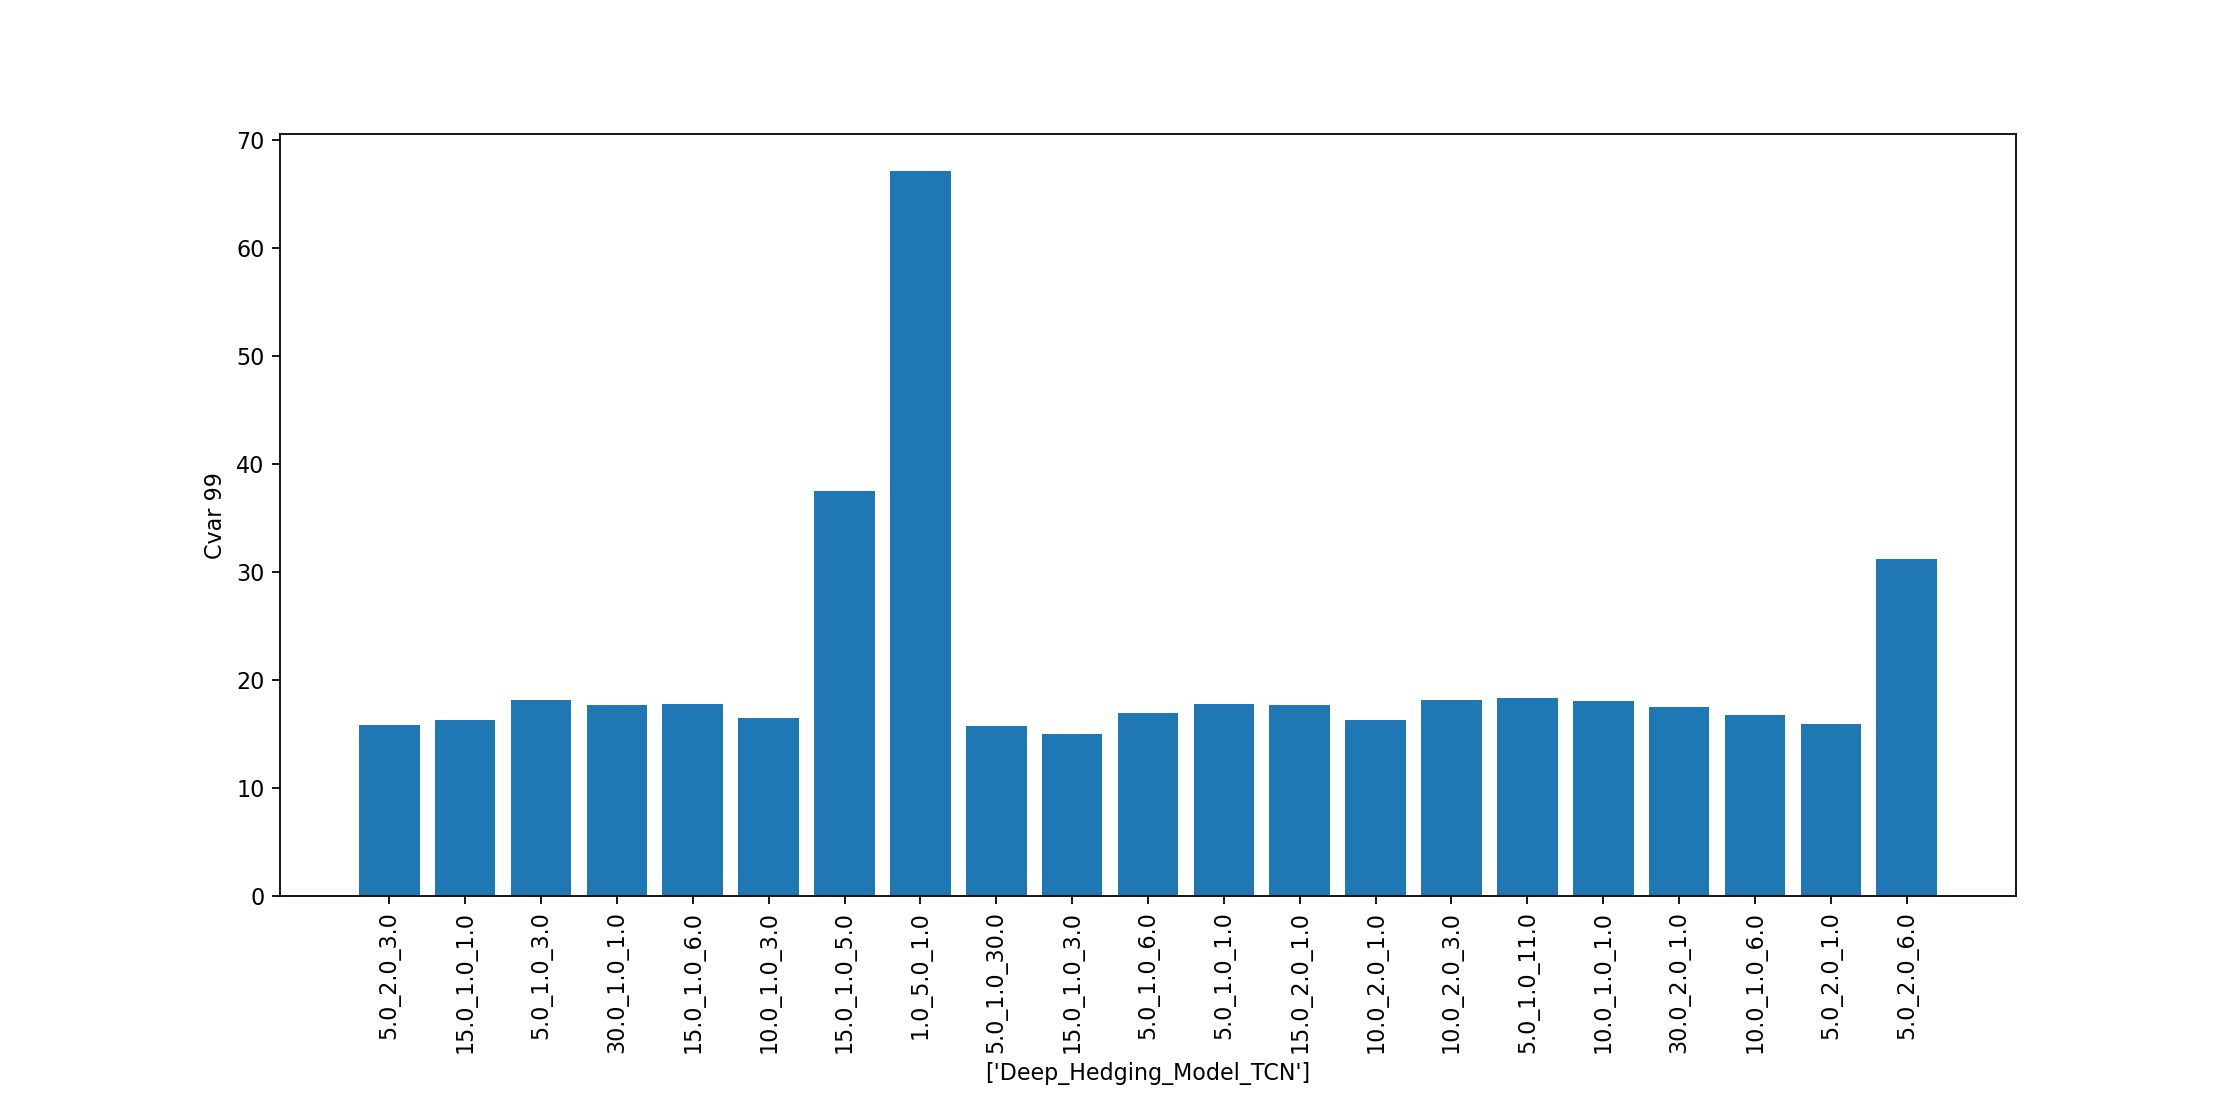

<IPython.core.display.Javascript object>


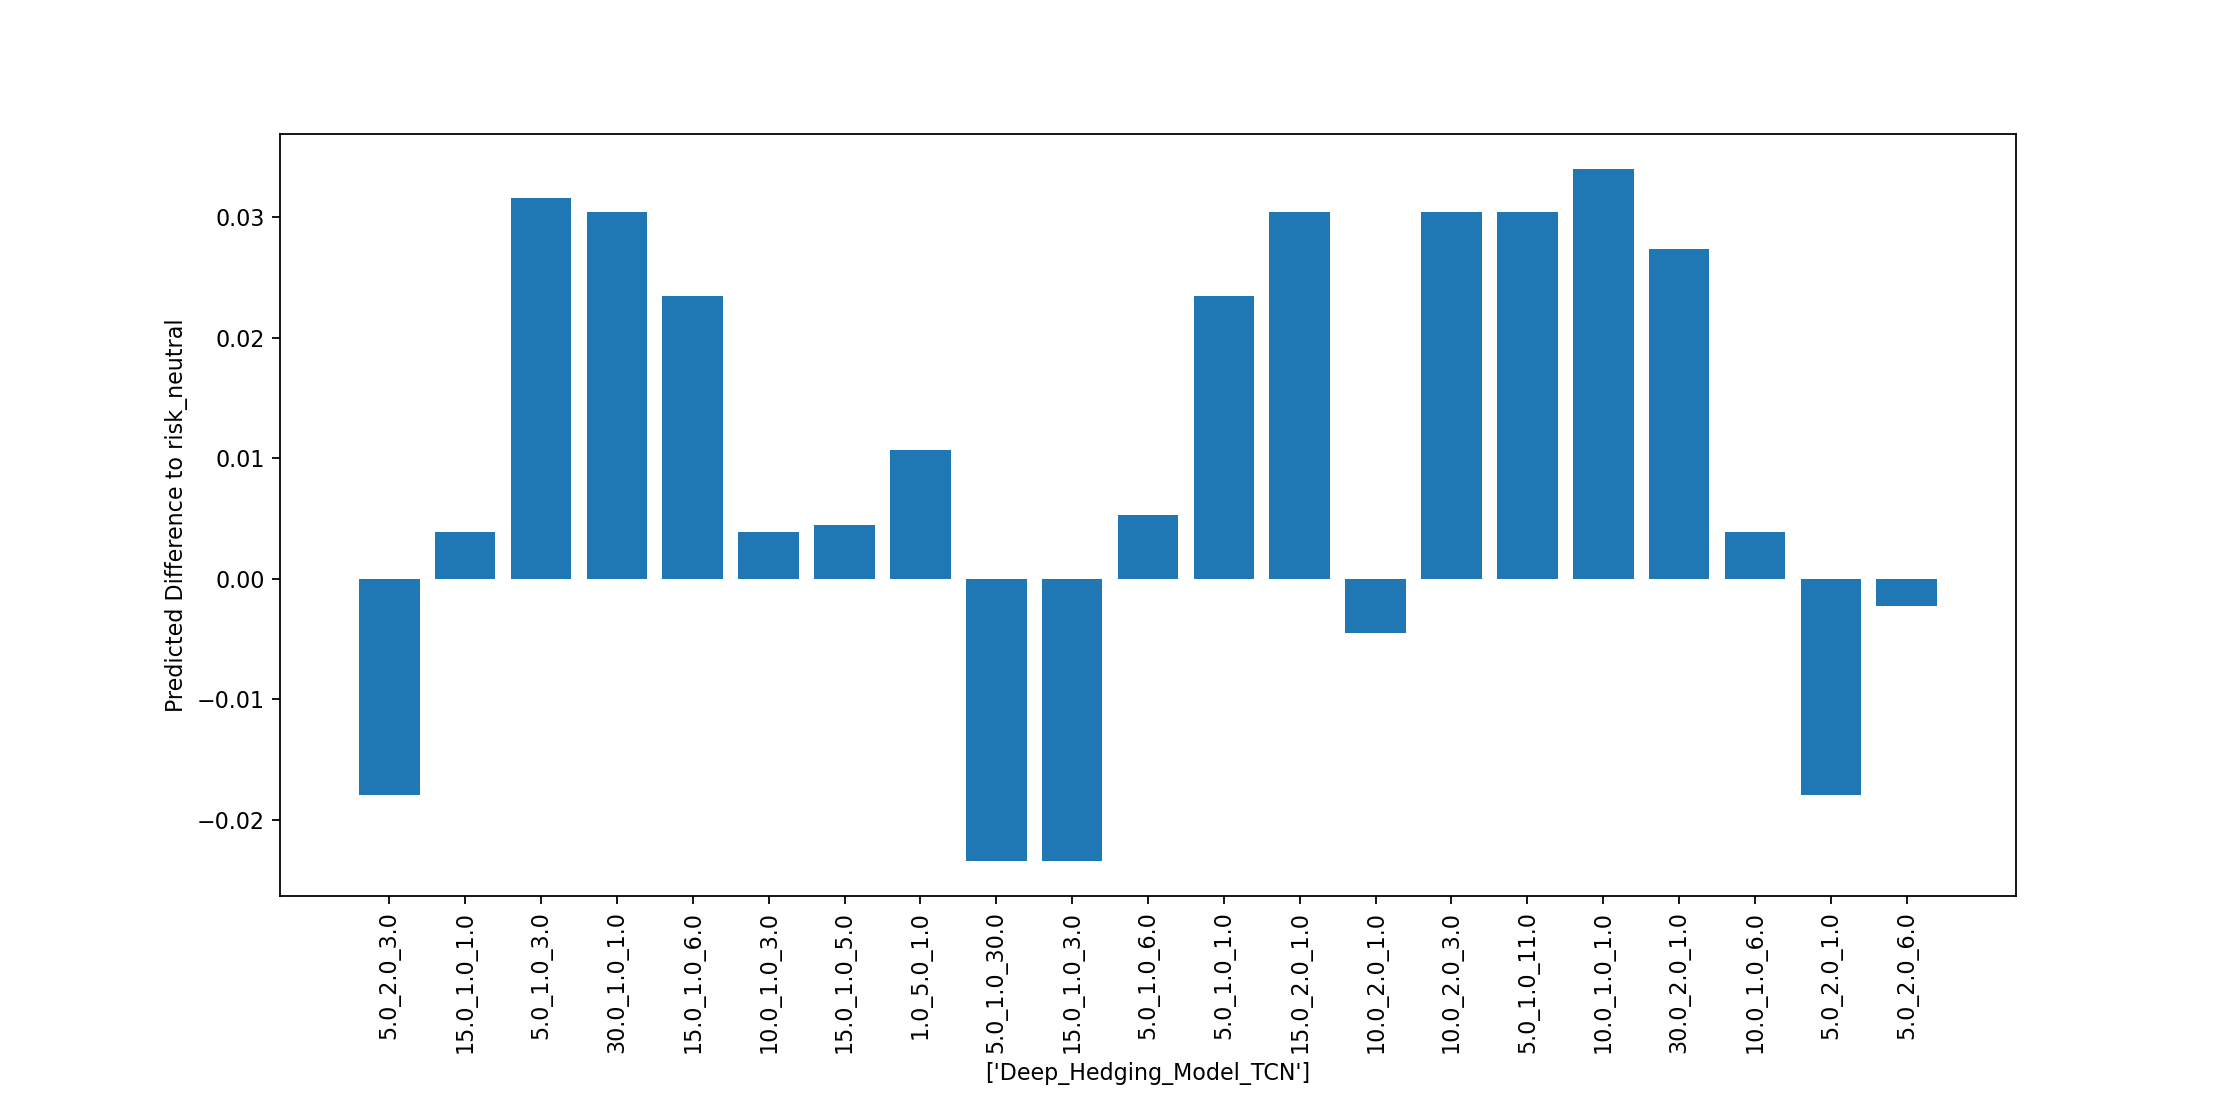

In [228]:
%matplotlib notebook
x=np.arange(Var_pd.shape[0])

fig,ax = plt.subplots(figsize=(14, 7), dpi=80) 
ax.set(ylabel = 'Difference to risk_neutral' ,
       xlabel = Var_pd['model'].unique(),
      ylim=[0,0.25])
ax.bar(x, Var_pd['price_diff'])
ax.set_xticks(x, Var_pd['name'],rotation=90)

plt.subplots_adjust(bottom=0.2)
fig,ax = plt.subplots(figsize=(14, 7), dpi=80) 
ax.set(ylabel = 'Variance of the PnL' ,
       xlabel = Var_pd['model'].unique())
ax.bar(x, Var_pd['Std_PnL'])
ax.set_xticks(x, Var_pd['name'],rotation=90)

plt.subplots_adjust(bottom=0.2)
fig,ax = plt.subplots(figsize=(14, 7), dpi=80) 
ax.set(ylabel = 'Cvar 99' ,
       xlabel = Var_pd['model'].unique())
ax.bar(x, Var_pd['CVar99'])
ax.set_xticks(x, Var_pd['name'],rotation=90)
plt.subplots_adjust(bottom=0.2)
fig,ax = plt.subplots(figsize=(14, 7), dpi=80) 
ax.set(ylabel = 'Predicted Difference to risk_neutral' ,
       xlabel = Var_pd['model'].unique())
ax.bar(x, Var_pd['predicted_price_diff'])
ax.set_xticks(x, Var_pd['name'],rotation=90)
plt.subplots_adjust(bottom=0.2)


<IPython.core.display.Javascript object>


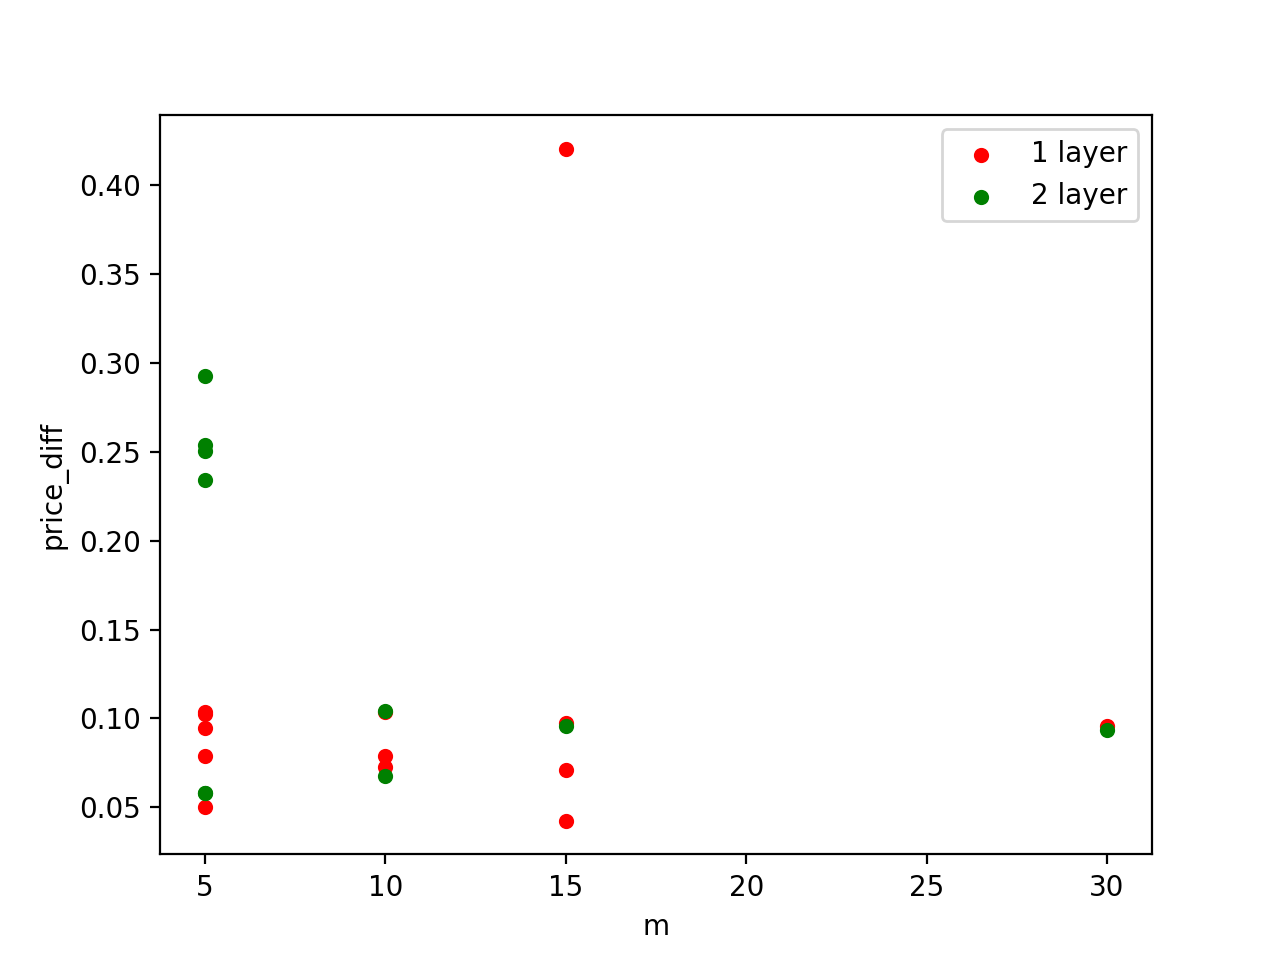

d                                          1.0
m                                         15.0
maxT                                       3.0
model                   Deep_Hedging_Model_TCN
epsilon                                    0.0
CVar99                               15.043025
CVar95                                4.857078
CVar90                                3.583834
CVar80                                2.947212
CVar50                                 2.56524
Var99                                -1.358244
Var95                                -1.657741
Var90                                -1.817382
Var80                                -1.994826
Var50                                  -2.2872
Mean_PnL                             -2.281182
Std_PnL                               0.373219
price                                 2.353057
price_BS                              2.287151
price_free                            2.310591
Var1                                 -3.250471
Var5         

In [217]:
fig,ax = plt.subplots(1)
cd = ['r','g']
#Var_pd = Var_pd.loc[Var_pd['epsilon'] == 0.001]
for d in [1,2]:
    Var_pd.loc[Var_pd['d'] == d].plot.scatter('m','price_diff',ax=ax,color = cd[d-1],label='%i layer' %d)
    
plt.legend()

Var_pd.loc[(Var_pd['price_diff'] < 0.2)]

Var_pd.iloc[np.argmin(Var_pd['price_diff'])]

<IPython.core.display.Javascript object>


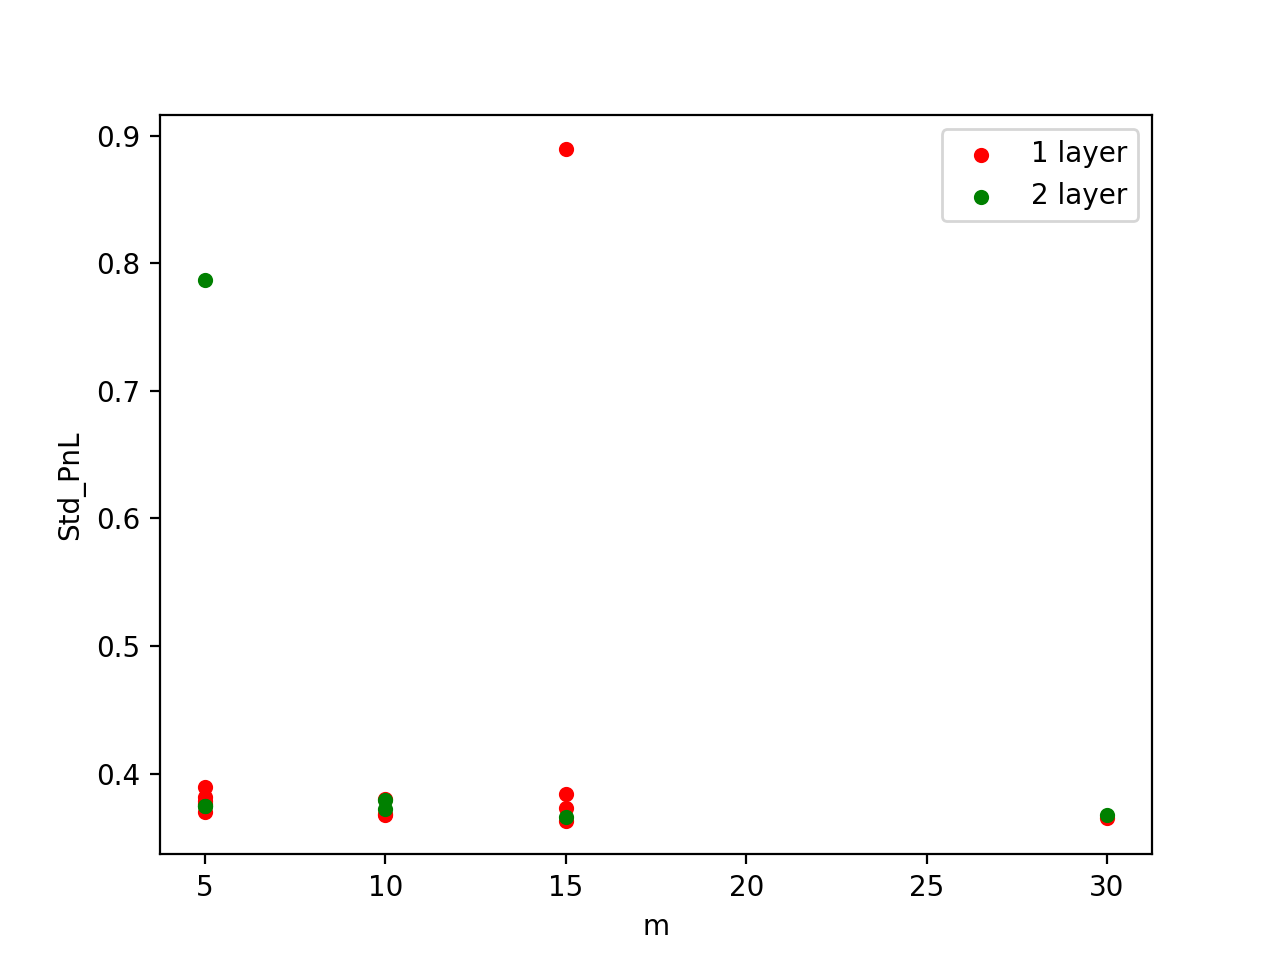

,d,m,maxT,model,epsilon,CVar99,CVar95,CVar90,CVar80,CVar50,...,price_free,Var1,Var5,Var20,CVar1,CVar5,CVar20,price_diff,predicted_price_diff,name
8,1.0,15.0,5.0,Deep_Hedging_Model_TCN,0.0,37.558167,9.337760,5.810209,4.046433,2.988168,...,2.282658,-4.389997,-3.746158,-3.011302,2.638977,2.653979,2.723602,0.420349,0.004492,15.0_1.0_5.0
9,5.0,1.0,1.0,Deep_Hedging_Model_TCN,0.0,67.184875,15.258123,8.767282,5.521860,3.574607,...,2.276439,-6.753206,-5.245629,-3.610819,2.932080,2.959686,3.087794,1.947193,0.010712,1.0_5.0_1.0
23,2.0,5.0,6.0,Deep_Hedging_Model_TCN,0.0,31.256456,8.082839,5.186138,3.737786,2.868775,...,2.289435,-4.242356,-3.503314,-2.832225,2.582031,2.594351,2.651522,0.292781,-0.002284,5.0_2.0_6.0


In [226]:
fig,ax = plt.subplots(1)
cd = ['r','g']
#Var_pdi = Var_pd
Var_pd = Var_pdi.loc[Var_pdi['epsilon'] != 0.001]
for d in [1,2]:
    Var_pd.loc[Var_pd['d'] == d].plot.scatter('m','pri',ax=ax,color = cd[d-1],label='%i layer' %d)
    
plt.legend()

Var_pd.loc[(Var_pd['CVar99'] < 0.2)]

Var_pd.iloc[np.argmin(Var_pd['Var99'])]

Var_pd.loc[(Var_pd['Std_PnL'] > 0.5)]


<IPython.core.display.Javascript object>


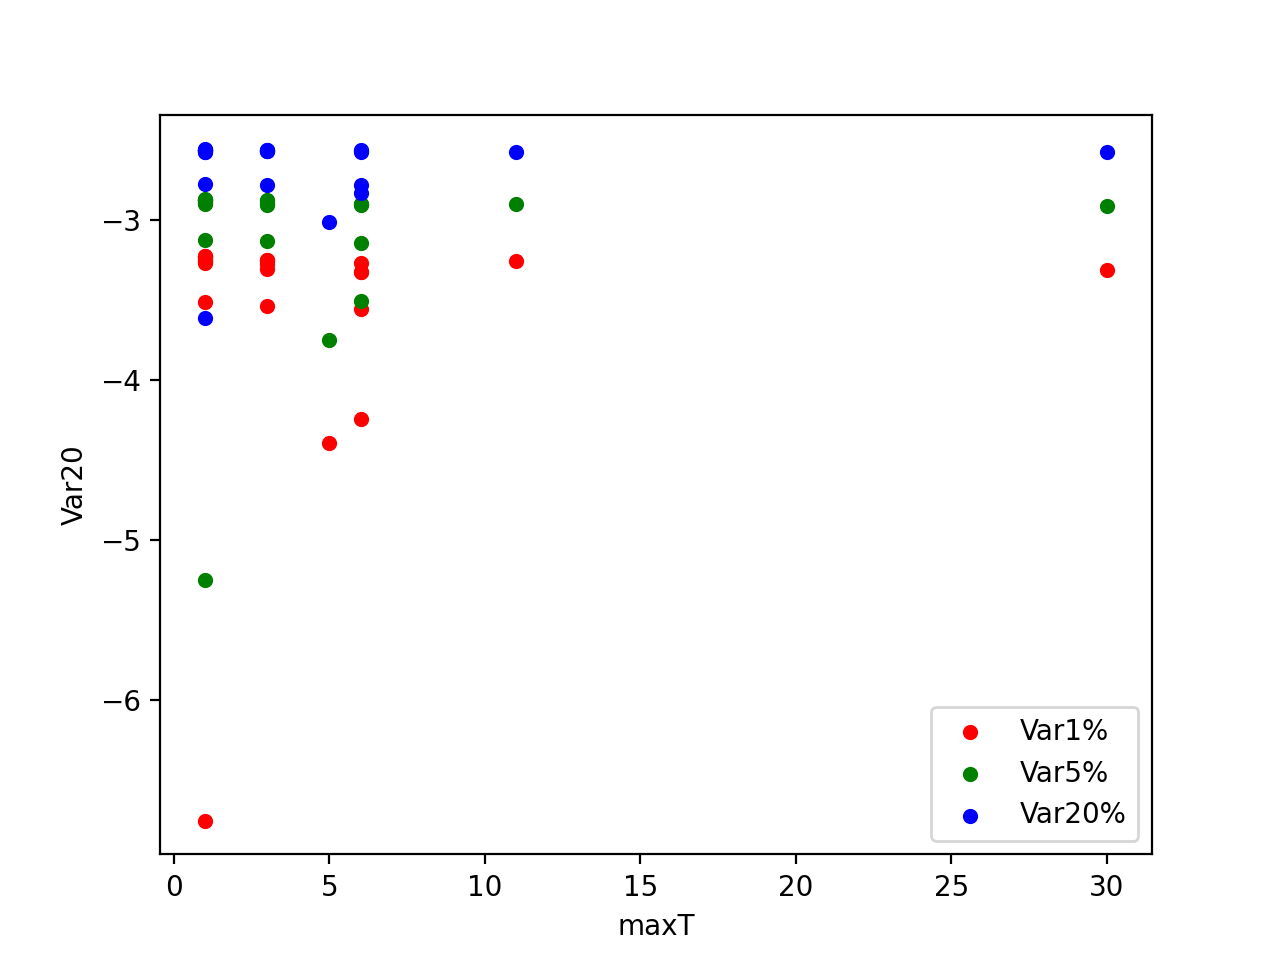

,d,m,maxT,epsilon,CVar99,CVar95,CVar90,CVar80,CVar50,Var99,...,price_BS,price_free,Var1,Var5,Var20,CVar1,CVar5,CVar20,price_diff,predicted_price_diff
d,1.000000,-0.275128,-0.250659,0.182696,0.778560,0.779058,0.779630,0.780601,0.782140,0.655774,...,NaN,0.102041,-0.790823,-0.785016,-0.777119,0.780352,0.780691,0.781661,0.832316,-0.102041
m,-0.275128,1.000000,-0.239497,-0.260833,-0.293127,-0.295550,-0.298557,-0.304498,-0.321689,-0.224260,...,NaN,-0.364350,0.280185,0.285765,0.308754,-0.347520,-0.345523,-0.337853,-0.276502,0.364350
maxT,-0.250659,-0.239497,1.000000,-0.063913,-0.118166,-0.116153,-0.113630,-0.108567,-0.093277,-0.050992,...,NaN,0.289101,0.077041,0.083711,0.094942,-0.068237,-0.070274,-0.077931,-0.127525,-0.289101
epsilon,0.182696,-0.260833,-0.063913,1.000000,0.202822,0.204829,0.207322,0.212256,0.226604,-0.155923,...,NaN,0.300233,-0.001696,-0.040029,-0.187008,0.248391,0.246695,0.240201,0.043444,-0.300233
CVar99,0.778560,-0.293127,-0.118166,0.202822,1.000000,0.999977,0.999881,0.999471,0.996512,0.896208,...,NaN,0.034216,-0.972721,-0.982144,-0.996129,0.986341,0.987407,0.991040,0.954425,-0.034216
CVar95,0.779058,-0.295550,-0.116153,0.204829,0.999977,1.000000,0.999963,0.999671,0.997061,0.896216,...,NaN,0.041065,-0.972804,-0.982299,-0.996574,0.987446,0.988468,0.991932,0.954073,-0.041065
CVar90,0.779630,-0.298557,-0.113630,0.207322,0.999881,0.999963,1.000000,0.999854,0.997680,0.896166,...,NaN,0.049618,-0.972843,-0.982427,-0.997065,0.988763,0.989728,0.992981,0.953570,-0.049618
CVar80,0.780601,-0.304498,-0.108567,0.212256,0.999471,0.999671,0.999854,1.000000,0.998698,0.895869,...,NaN,0.066689,-0.972709,-0.982468,-0.997826,0.991174,0.992028,0.994859,0.952356,-0.066689
CVar50,0.782140,-0.321689,-0.093277,0.226604,0.996512,0.997061,0.997680,0.998698,1.000000,0.893428,...,NaN,0.117495,-0.970618,-0.980884,-0.998363,0.996646,0.997164,0.998729,0.947081,-0.117495
Var99,0.655774,-0.224260,-0.050992,-0.155923,0.896208,0.896216,0.896166,0.895869,0.893428,1.000000,...,NaN,0.034810,-0.942331,-0.935132,-0.898202,0.884650,0.885578,0.888732,0.857603,-0.034810


In [220]:
fig,ax = plt.subplots(1)
cd = ['r','g']
#Var_pdi = Var_pd
Var_pd = Var_pdi.loc[Var_pdi['epsilon'] != 0.001]
Var_pd = Var_pdi
Var_pd.plot.scatter('maxT','Var1',color= 'r',ax=ax,label='Var1%')
Var_pd.plot.scatter('maxT','Var5',color='g',ax=ax,label='Var5%')
Var_pd.plot.scatter('maxT','Var20',color='b',ax=ax,label='Var20%')
plt.legend()

Var_pd.loc[(Var_pd['CVar99'] < 0.2)]

Var_pd.iloc[np.argmin(Var_pd['Var99'])]

Var_pd.corr()


<IPython.core.display.Javascript object>


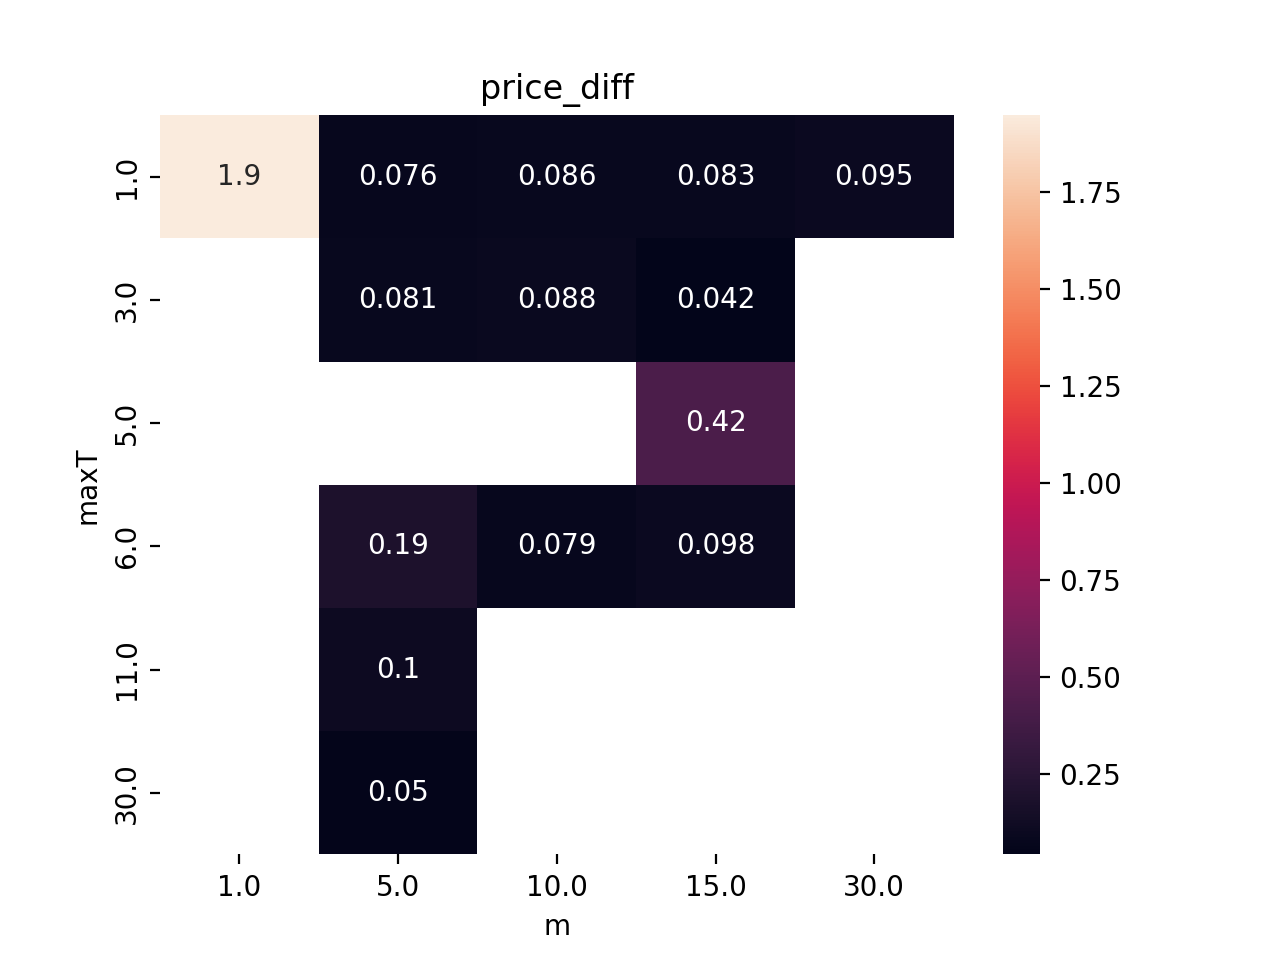

Text(0.5, 1.0, 'price_diff')

In [230]:
import seaborn as sns
f = 200
fig,ax = plt.subplots()
Var_pd = Var_pdi.loc[Var_pdi['epsilon'] != 0.001]

on = ['maxT','m']
what= 'price_diff'
# fill data

pp = Var_pd.groupby(on).mean()
ax = sns.heatmap(pp[what].unstack(),annot=True)
plt.show()
ax.set_title(what)

<IPython.core.display.Javascript object>


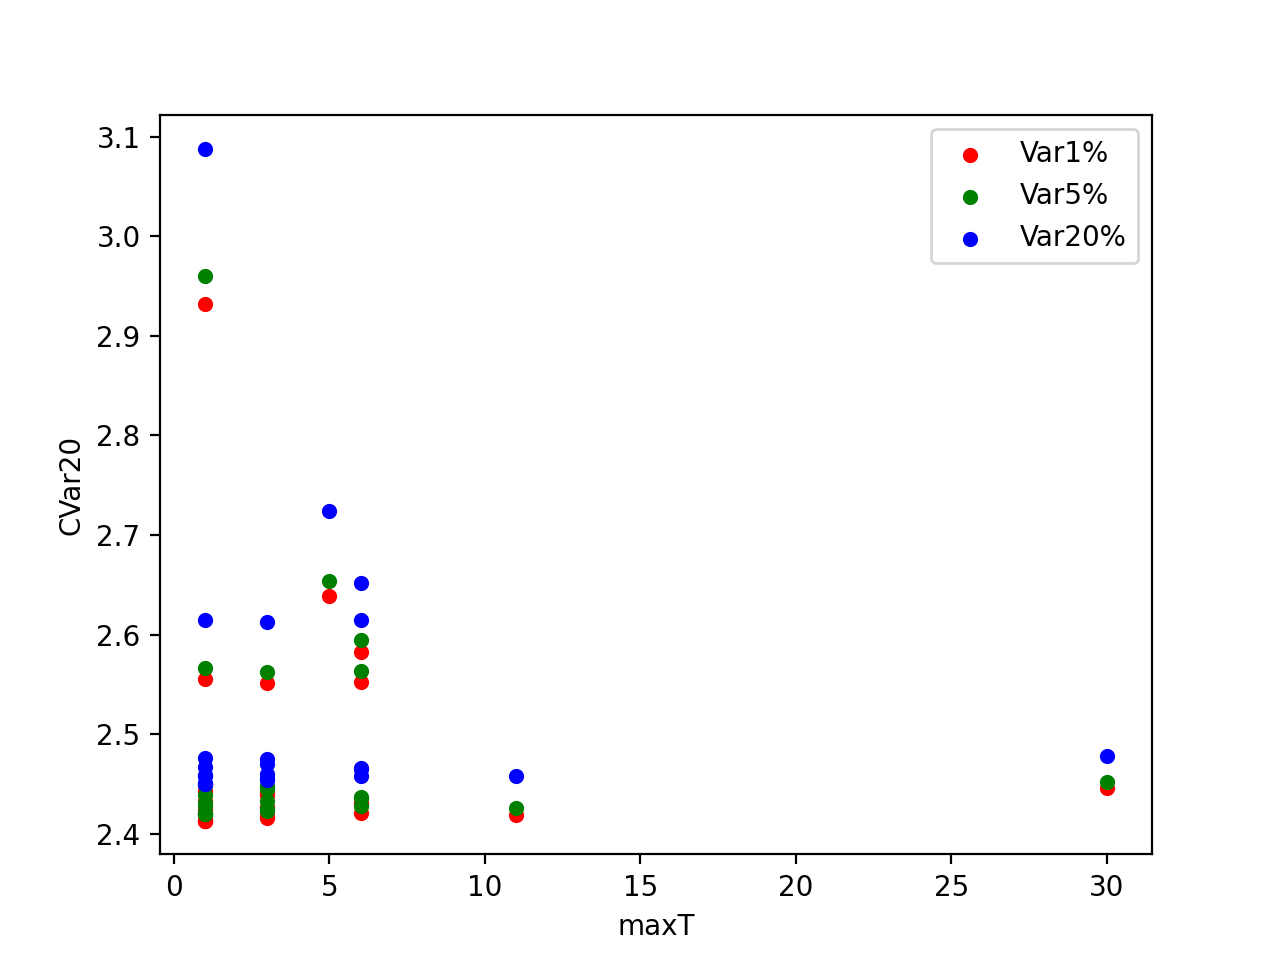

,d,m,maxT,epsilon,CVar99,CVar95,CVar90,CVar80,CVar50,Var99,...,price_BS,price_free,Var1,Var5,Var20,CVar1,CVar5,CVar20,price_diff,predicted_price_diff
d,1.000000,-0.275128,-0.250659,0.182696,0.778560,0.779058,0.779630,0.780601,0.782140,0.655774,...,NaN,0.102041,-0.790823,-0.785016,-0.777119,0.780352,0.780691,0.781661,0.832316,-0.102041
m,-0.275128,1.000000,-0.239497,-0.260833,-0.293127,-0.295550,-0.298557,-0.304498,-0.321689,-0.224260,...,NaN,-0.364350,0.280185,0.285765,0.308754,-0.347520,-0.345523,-0.337853,-0.276502,0.364350
maxT,-0.250659,-0.239497,1.000000,-0.063913,-0.118166,-0.116153,-0.113630,-0.108567,-0.093277,-0.050992,...,NaN,0.289101,0.077041,0.083711,0.094942,-0.068237,-0.070274,-0.077931,-0.127525,-0.289101
epsilon,0.182696,-0.260833,-0.063913,1.000000,0.202822,0.204829,0.207322,0.212256,0.226604,-0.155923,...,NaN,0.300233,-0.001696,-0.040029,-0.187008,0.248391,0.246695,0.240201,0.043444,-0.300233
CVar99,0.778560,-0.293127,-0.118166,0.202822,1.000000,0.999977,0.999881,0.999471,0.996512,0.896208,...,NaN,0.034216,-0.972721,-0.982144,-0.996129,0.986341,0.987407,0.991040,0.954425,-0.034216
CVar95,0.779058,-0.295550,-0.116153,0.204829,0.999977,1.000000,0.999963,0.999671,0.997061,0.896216,...,NaN,0.041065,-0.972804,-0.982299,-0.996574,0.987446,0.988468,0.991932,0.954073,-0.041065
CVar90,0.779630,-0.298557,-0.113630,0.207322,0.999881,0.999963,1.000000,0.999854,0.997680,0.896166,...,NaN,0.049618,-0.972843,-0.982427,-0.997065,0.988763,0.989728,0.992981,0.953570,-0.049618
CVar80,0.780601,-0.304498,-0.108567,0.212256,0.999471,0.999671,0.999854,1.000000,0.998698,0.895869,...,NaN,0.066689,-0.972709,-0.982468,-0.997826,0.991174,0.992028,0.994859,0.952356,-0.066689
CVar50,0.782140,-0.321689,-0.093277,0.226604,0.996512,0.997061,0.997680,0.998698,1.000000,0.893428,...,NaN,0.117495,-0.970618,-0.980884,-0.998363,0.996646,0.997164,0.998729,0.947081,-0.117495
Var99,0.655774,-0.224260,-0.050992,-0.155923,0.896208,0.896216,0.896166,0.895869,0.893428,1.000000,...,NaN,0.034810,-0.942331,-0.935132,-0.898202,0.884650,0.885578,0.888732,0.857603,-0.034810


In [222]:
fig,ax = plt.subplots(1)
cd = ['r','g']
#Var_pdi = Var_pd
Var_pd = Var_pdi.loc[Var_pdi['epsilon'] != 0.001]
Var_pd = Var_pdi
Var_pd.plot.scatter('maxT','CVar1',color= 'r',ax=ax,label='Var1%')
Var_pd.plot.scatter('maxT','CVar5',color='g',ax=ax,label='Var5%')
Var_pd.plot.scatter('maxT','CVar20',color='b',ax=ax,label='Var20%')
plt.legend()

Var_pd.loc[(Var_pd['CVar99'] < 0.2)]

Var_pd.iloc[np.argmin(Var_pd['Var99'])]

Var_pd.corr()


<IPython.core.display.Javascript object>


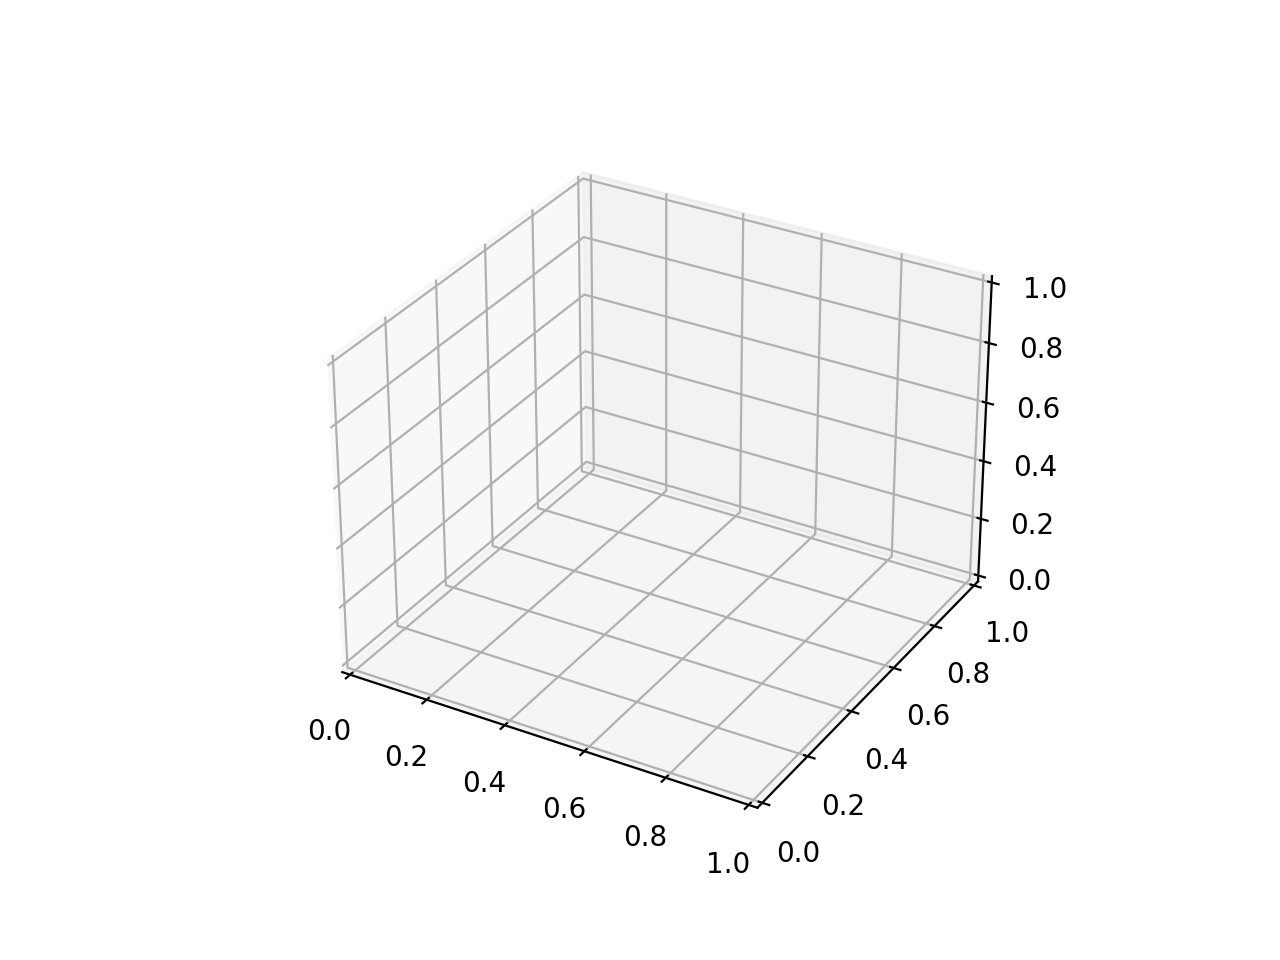

NameError: name 'Cvar99' is not defined

In [223]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = x
xdata = Cvar99
ydata = price_diff
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');

In [78]:
#Select Best params for each model and then compare models#
sel_file1 = "30_1_5_0.001_Deep_Hedging_Model_MLP_var.csv"
sel_file2 = "5_2_5_0.001_Deep_Hedging_Model_MLP_CLAMP_var.csv"
sel_file3 = "30_1_11_0.001_Deep_Hedging_Model_LSTM_CLAMP_var.csv"

val1=pd.read_csv(path1+sel_file1).transpose()
val2=pd.read_csv(path2+sel_file2).transpose()
val3=pd.read_csv(path3+sel_file3).transpose()

bar1 =np.double(val1.iloc[1,:])
bar2 =np.double(val2.iloc[1,:])
bar3 =np.double(val3.iloc[1,:])

mean1 = bar1.mean()
mean2 = bar2.mean()
mean3= bar3.mean()

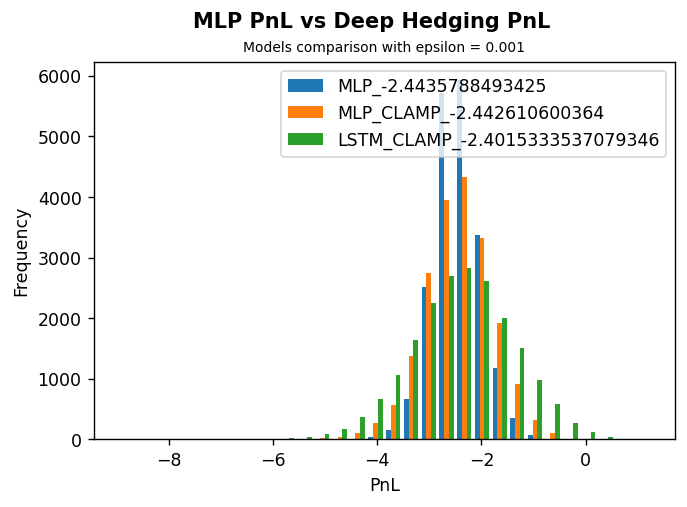

In [79]:
#bar =np.double(val.iloc[1,:])
# Plot Black-Scholes PnL and Deep Hedging PnL (with BS_price charged on both).
fig_PnL = plt.figure(dpi=125, facecolor='w')
fig_PnL.suptitle("MLP PnL vs Deep Hedging PnL \n",
                     fontweight="bold")
ax = fig_PnL.add_subplot()
ax.set_title("Models comparison with epsilon = " + str(epsilon),
                 fontsize=8)
ax.set_xlabel("PnL")
ax.set_ylabel("Frequency")
ax.hist((bar1,bar2,bar3), bins=30,
            label=["MLP_"+str(mean1), "MLP_CLAMP_"+str(mean2), "LSTM_CLAMP_"+str(mean3)])
ax.legend()

